In [1]:
#Импортируем библиотеку
import os
import pandas as pd
from dotenv import load_dotenv, find_dotenv
from sqlalchemy import create_engine
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# подгружаем .env
load_dotenv()

True

In [3]:
# Считываем все креды
src_host = os.environ.get('DB_SOURCE_HOST')
src_port = os.environ.get('DB_SOURCE_PORT')
src_username = os.environ.get('DB_SOURCE_USER')
src_password = os.environ.get('DB_SOURCE_PASSWORD')
src_db = os.environ.get('DB_SOURCE_NAME') 

dst_host = os.environ.get('DB_DESTINATION_HOST')
dst_port = os.environ.get('DB_DESTINATION_PORT')
dst_username = os.environ.get('DB_DESTINATION_USER')
dst_password = os.environ.get('DB_DESTINATION_PASSWORD')
dst_db = os.environ.get('DB_DESTINATION_NAME')

s3_bucket = os.environ.get('S3_BUCKET_NAME')
s3_access_key = os.environ.get('AWS_ACCESS_KEY_ID')
s3_secret_access_key = os.environ.get('AWS_SECRET_ACCESS_KEY')

In [4]:
# Создадим соединения
src_conn = create_engine(f'postgresql://{src_username}:{src_password}@{src_host}:{src_port}/{src_db}')
dst_conn = create_engine(f'postgresql://{dst_username}:{dst_password}@{dst_host}:{dst_port}/{dst_db}')

In [23]:
# Пример выгрузки данных из БД
TABLE = 'flats'
TABLE_2 = 'buildings'
SQL = f"""
select f.*, b.build_year, b.building_type_int, b.latitude, b.longitude, b.ceiling_height, b.flats_count, b.floors_total, b.has_elevator
from {TABLE} f
inner join {TABLE_2} b
on b.id=f.building_id
"""
data = pd.read_sql(SQL, dst_conn)

In [27]:
#Создадим таблицу с признаками (Удалим из нее целевой и ID)
features = data.drop(columns=['id','price','building_id'])


In [30]:
features.dtypes.value_counts()

int64      6
float64    6
bool       3
Name: count, dtype: int64

In [32]:
#Разделим признаки по типам
num_features = features.select_dtypes(include=['float', 'int'])
bool_features = features.select_dtypes(include=['bool'])

## Исследовательский анализ

In [53]:
#Посмотрим на пропуски
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141362 entries, 0 to 141361
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   floor              141362 non-null  int64  
 1   is_apartment       141362 non-null  bool   
 2   kitchen_area       141362 non-null  float64
 3   living_area        141362 non-null  float64
 4   rooms              141362 non-null  int64  
 5   studio             141362 non-null  bool   
 6   total_area         141362 non-null  float64
 7   build_year         141362 non-null  int64  
 8   building_type_int  141362 non-null  int64  
 9   latitude           141362 non-null  float64
 10  longitude          141362 non-null  float64
 11  ceiling_height     141362 non-null  float64
 12  flats_count        141362 non-null  int64  
 13  floors_total       141362 non-null  int64  
 14  has_elevator       141362 non-null  bool   
dtypes: bool(3), float64(6), int64(6)
memory usage: 13.3

Пропусков нет

count    141362.000000
mean          7.467346
std           5.717144
min           1.000000
25%           3.000000
50%           6.000000
75%          10.000000
max          56.000000
Name: floor, dtype: float64

<Axes: xlabel='floor', ylabel='Count'>

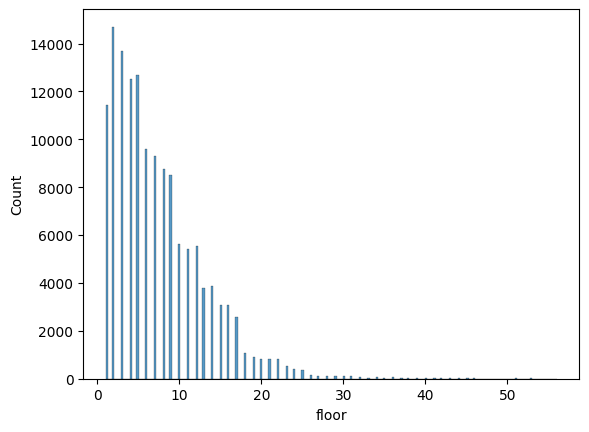

count    141362.000000
mean          9.001579
std           5.264076
min           0.000000
25%           6.100000
50%           8.800000
75%          10.200000
max         203.000000
Name: kitchen_area, dtype: float64

<Axes: xlabel='kitchen_area', ylabel='Count'>

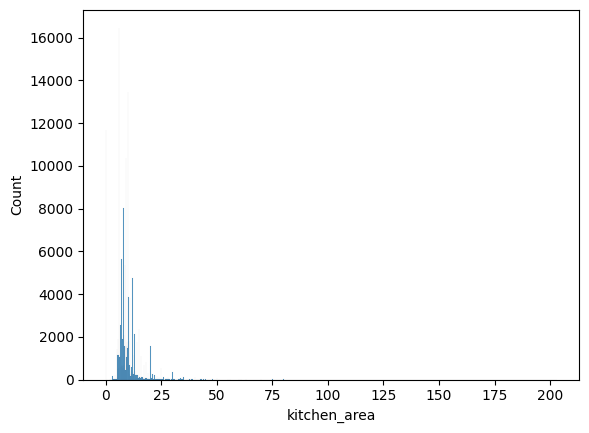

count    141362.000000
mean         31.056948
std          23.968640
min           0.000000
25%          19.000000
50%          29.400000
75%          41.400002
max         700.000000
Name: living_area, dtype: float64

<Axes: xlabel='living_area', ylabel='Count'>

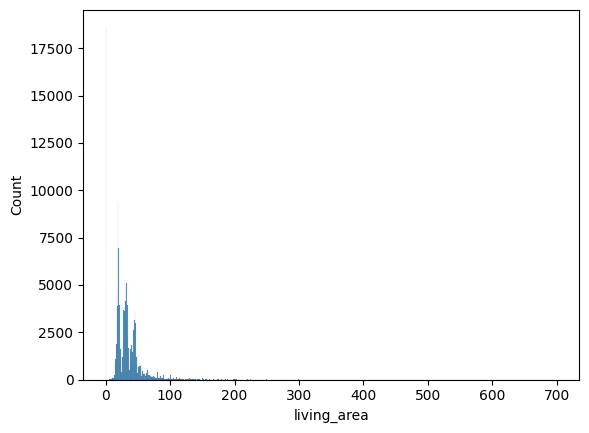

count    141362.000000
mean          2.129476
std           0.994340
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: rooms, dtype: float64

<Axes: xlabel='rooms', ylabel='Count'>

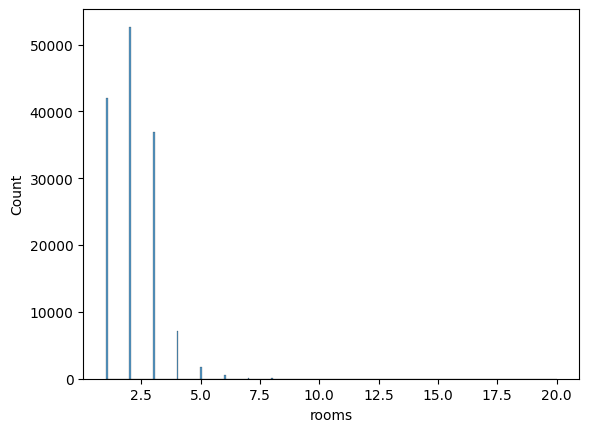

count    141362.000000
mean         62.374644
std          40.295864
min          11.000000
25%          39.299999
50%          53.000000
75%          72.000000
max         960.299988
Name: total_area, dtype: float64

<Axes: xlabel='total_area', ylabel='Count'>

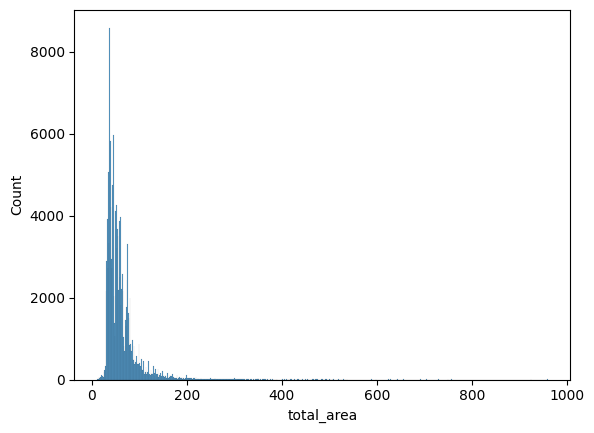

count    141362.000000
mean       1986.600048
std          22.136409
min        1901.000000
25%        1969.000000
50%        1985.000000
75%        2007.000000
max        2023.000000
Name: build_year, dtype: float64

<Axes: xlabel='build_year', ylabel='Count'>

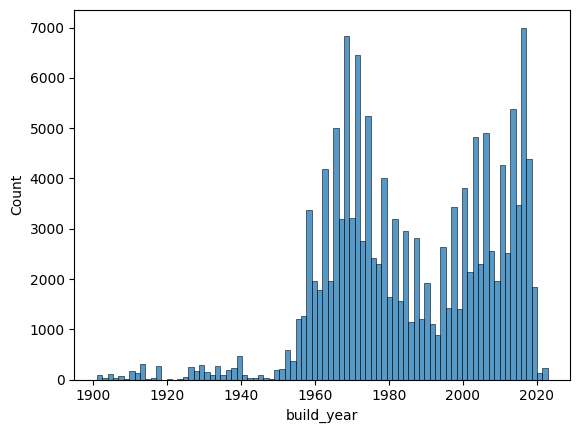

count    141362.000000
mean          3.232941
std           1.459461
min           0.000000
25%           2.000000
50%           4.000000
75%           4.000000
max           6.000000
Name: building_type_int, dtype: float64

<Axes: xlabel='building_type_int', ylabel='Count'>

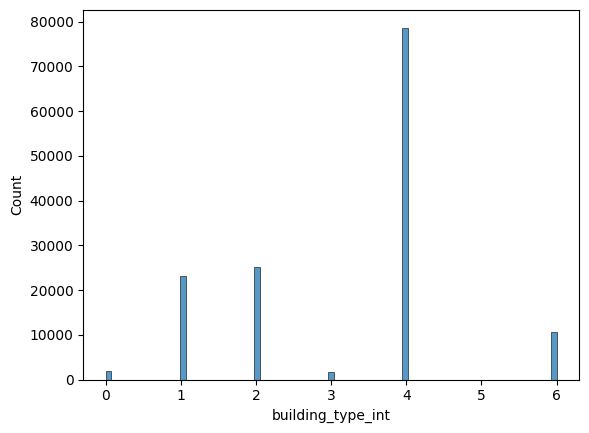

count    141362.000000
mean         55.730059
std           0.102611
min          55.211460
25%          55.653858
50%          55.724686
75%          55.807323
max          56.011032
Name: latitude, dtype: float64

<Axes: xlabel='latitude', ylabel='Count'>

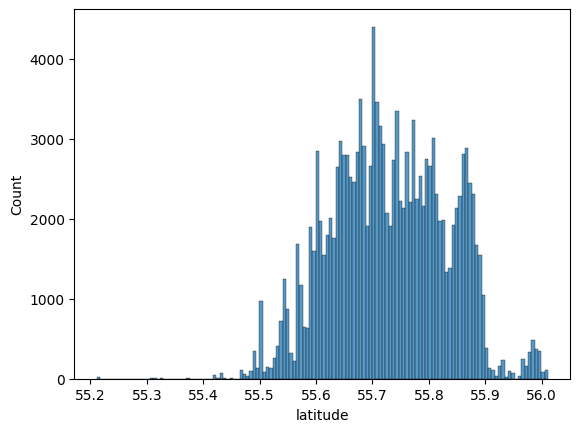

count    141362.000000
mean         37.589235
std           0.150122
min          36.864372
25%          37.491764
50%          37.581146
75%          37.691055
max          37.946411
Name: longitude, dtype: float64

<Axes: xlabel='longitude', ylabel='Count'>

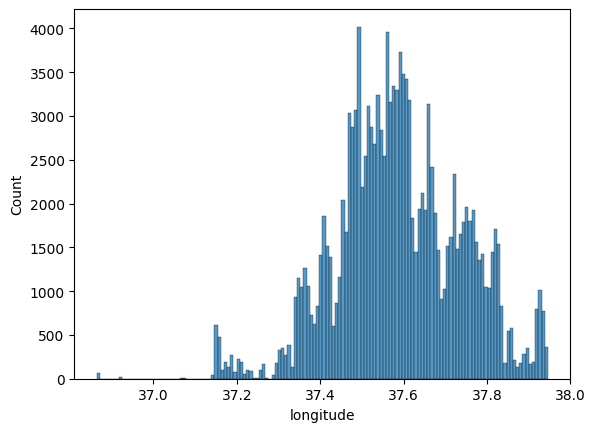

count    141362.000000
mean          2.753650
std           0.223275
min           2.000000
25%           2.640000
50%           2.640000
75%           2.800000
max          27.000000
Name: ceiling_height, dtype: float64

<Axes: xlabel='ceiling_height', ylabel='Count'>

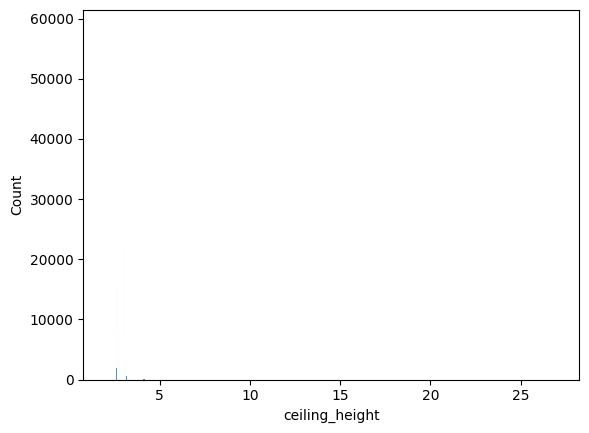

count    141362.000000
mean        251.993230
std         207.336169
min           1.000000
25%         111.000000
50%         200.000000
75%         324.000000
max        4455.000000
Name: flats_count, dtype: float64

<Axes: xlabel='flats_count', ylabel='Count'>

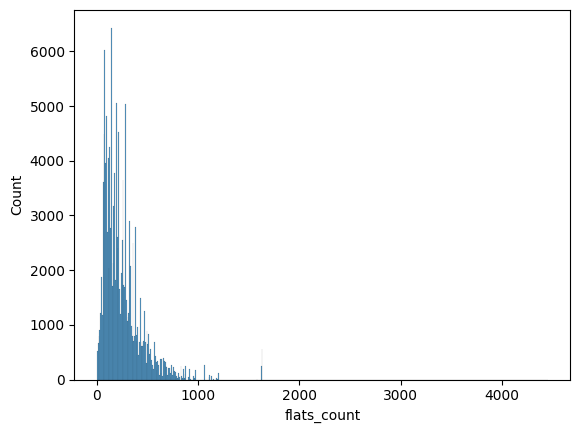

count    141362.000000
mean         14.107554
std           6.898045
min           1.000000
25%           9.000000
50%          14.000000
75%          17.000000
max          99.000000
Name: floors_total, dtype: float64

<Axes: xlabel='floors_total', ylabel='Count'>

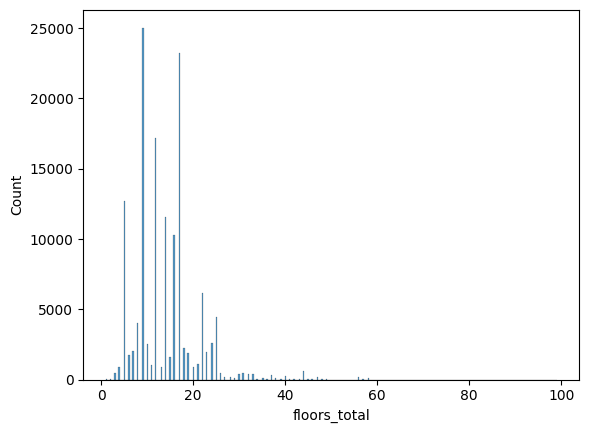

In [54]:
#Посмотри на распределение данных
for column in num_features.columns:
    # Вывод статистики для каждого столбца
    display(num_features[column].describe())

    # Построение гистограммы для каждого столбца
    display(sns.histplot(num_features[column]))
    # Показываем график после построения
    plt.show()

In [57]:
#Поиск дубликатов
feature_cols = sorted(list(data.drop(columns=['id','price','building_id']).columns))
is_duplicated_features = data.duplicated(subset=feature_cols, keep=False)
print(len(data[is_duplicated_features]))

36488


#### Выводы:
- Пропусков в данных нет
- Есть сильно откланяющиеся значения (в основном это про данные площадей)
- В выборке два типа данных num / bool
- В выборке есть дубликаты

In [60]:
# Функция для удаления дубликатов
def remove_duplicates(data):
    feature_cols = data.columns.drop(['id','price','building_id']).tolist()
    is_duplicated_features = data.duplicated(subset=feature_cols, keep=False)
    data = data[~is_duplicated_features].reset_index(drop=True)
    return data 

In [70]:
#Функция для очистки выбросов
def remove_outliers(df: pd.DataFrame) -> pd.DataFrame:
        num_cols = df.select_dtypes(include=['float','int']).columns
        threshold = 1.5
        potential_outliers = pd.DataFrame(False, index=df.index, columns=num_cols)
        
        for col in num_cols:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            margin = threshold * IQR
            lower = Q1 - margin
            upper = Q3 + margin
            potential_outliers[col] = ~df[col].between(lower, upper)
        
        outliers = potential_outliers.any(axis=1)
        df_cleaned = df[~outliers]
        return df_cleaned

In [71]:
remove_outliers(data)

,id,floor,is_apartment,kitchen_area,living_area,rooms,studio,total_area,price,building_id,build_year,building_type_int,latitude,longitude,ceiling_height,flats_count,floors_total,has_elevator
0,0,9,False,9.90,19.900000,1,False,35.099998,9500000,6220,1965,6,55.717113,37.781120,2.64,84,12,True
1,1,7,False,0.00,16.600000,1,False,43.000000,13500000,18012,2001,2,55.794849,37.608013,3.00,97,10,True
2,2,9,False,9.00,32.000000,2,False,56.000000,13500000,17821,2000,4,55.740040,37.761742,2.70,80,10,True
4,4,3,False,3.00,14.000000,1,False,24.000000,5200000,9293,1971,1,55.808807,37.707306,2.60,208,9,True
5,5,9,False,0.00,0.000000,2,False,51.009998,8490104,23964,2017,4,55.724728,37.743069,2.70,192,17,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141356,141356,8,False,6.00,42.000000,3,False,64.000000,10800000,9503,1971,4,55.740402,37.834579,2.64,428,9,True
141358,141358,5,False,5.28,28.330000,2,False,41.110001,7400000,3162,1960,1,55.727470,37.768677,2.48,80,5,False
141359,141359,7,False,5.30,20.000000,1,False,31.500000,9700000,6513,1966,4,55.704315,37.506584,2.64,72,9,True
141360,141360,15,False,13.80,33.700001,2,False,65.300003,11750000,23952,2017,4,55.699863,37.939564,2.70,480,25,True
